#### Written by Muhammed Yaseen
#### 111701032
#### CSE | B.Tech | IIT-PKD

In [1]:
import numpy as np                     #for linear algebra
import matplotlib.pyplot as plt        #helper library for plotting
import pandas as pd                    #data processing with csv files
import seaborn as sns                  #library for statistical graphics

#add plots to the jupyter notebook
%matplotlib inline 

import warnings
#from scipy import stats
from scipy.stats import norm, skew     #some math utilities

In [2]:
#Libraries for modelling 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import r2_score, make_scorer
from sklearn.metrics import mean_squared_error

In [3]:
#load the train and test data provided into a pandas dataframe from the csv file

train = pd.read_csv('houseprice_train.csv')

test = pd.read_csv('houseprice_test.csv')

In [4]:
train.info()        #metadata of train dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
train.describe() #data values with some relavant statistics of the train data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
test.info() #metadata of test data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [7]:
test.describe()      ##data values with some relavant statistics of the test data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [8]:
print ("Size of train data : {}" .format(train.shape))

print ("Size of test data : {}" .format(test.shape))

#train data has 81 features
#test data has 80 features, excluding SalePrice
#train data has 1460 data samples
#test data has 1459 samples

Size of train data : (1460, 81)
Size of test data : (1459, 80)


In [9]:
#a utility function to check the skewness of a feature
def check_skewness(col):
    sns.distplot(train[col] , fit=norm);   #A distplot plots a univariate distribution of observations.
    fig = plt.figure()
    (mu, sigma) = norm.fit(train[col])     #calculate mean and std.dev of the particular feature of the train data
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Cleaning the data

In [10]:
#Save the 'Id' column for future use
train_ID = train['Id']
test_ID = test['Id']

#'Id' is dropped as it is irrelevant in the prediction process
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

In [11]:
print ("Size of train data after dropping Id: {}" .format(train.shape))
print ("Size of test data after dropping Id: {}" .format(test.shape))

#train has 80 features, test has 79 features excluding SalePrice

Size of train data after dropping Id: (1460, 80)
Size of test data after dropping Id: (1459, 79)


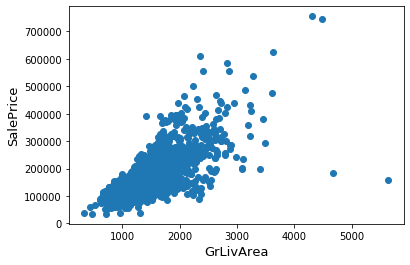

In [12]:
'''

Dealing with outliers

Outlinear in the GrLivArea is recommended by the author of the data to remove it. 

Ref: Ames housing dataset http://jse.amstat.org/v19n3/decock.pdf

'''

fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

##### Please note the outliers towards the right.

In [13]:
train = train[train['GrLivArea'] < 4000]
#train data is rid of the samples having GrLivArea >= 4000

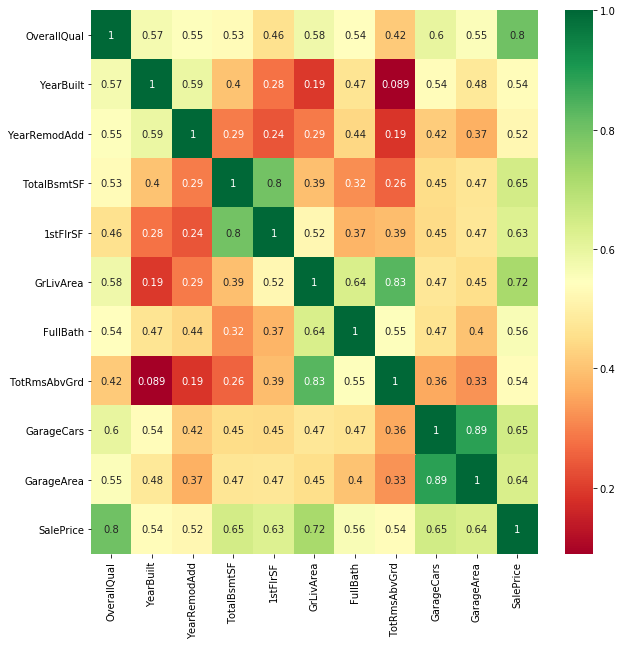

In [14]:
#check for correlation with the features
corrmat = train.corr()
#the features having corr > 0.5 and corr < -0.5 are considered seperately
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
#plot the correlation map
g = sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Some points to note:
#### 1. OverallQual, GrLivArea, TotalBsmtSF have maximum correlation with SalePrice
#### 2. GarageArea and GarageCars have highest correlation, which can be understood from their nature. A similar pattern is observed across such data feature pairs.

In [15]:
#print the top_corr_feature types (for our knowledge)
print(train[top_corr_features].dtypes)
#we can see that all are numerical types

OverallQual     int64
YearBuilt       int64
YearRemodAdd    int64
TotalBsmtSF     int64
1stFlrSF        int64
GrLivArea       int64
FullBath        int64
TotRmsAbvGrd    int64
GarageCars      int64
GarageArea      int64
SalePrice       int64
dtype: object


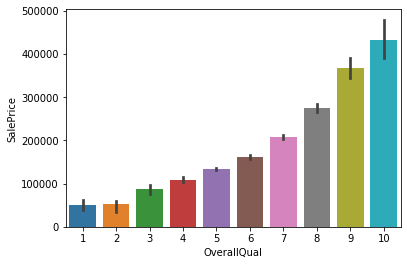

In [16]:
#A barplot to see how OverallQual depends on the SalePrice
sns.barplot(train.OverallQual,train.SalePrice)

#### Almost a linear variance as it should be from the correlation plot

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')


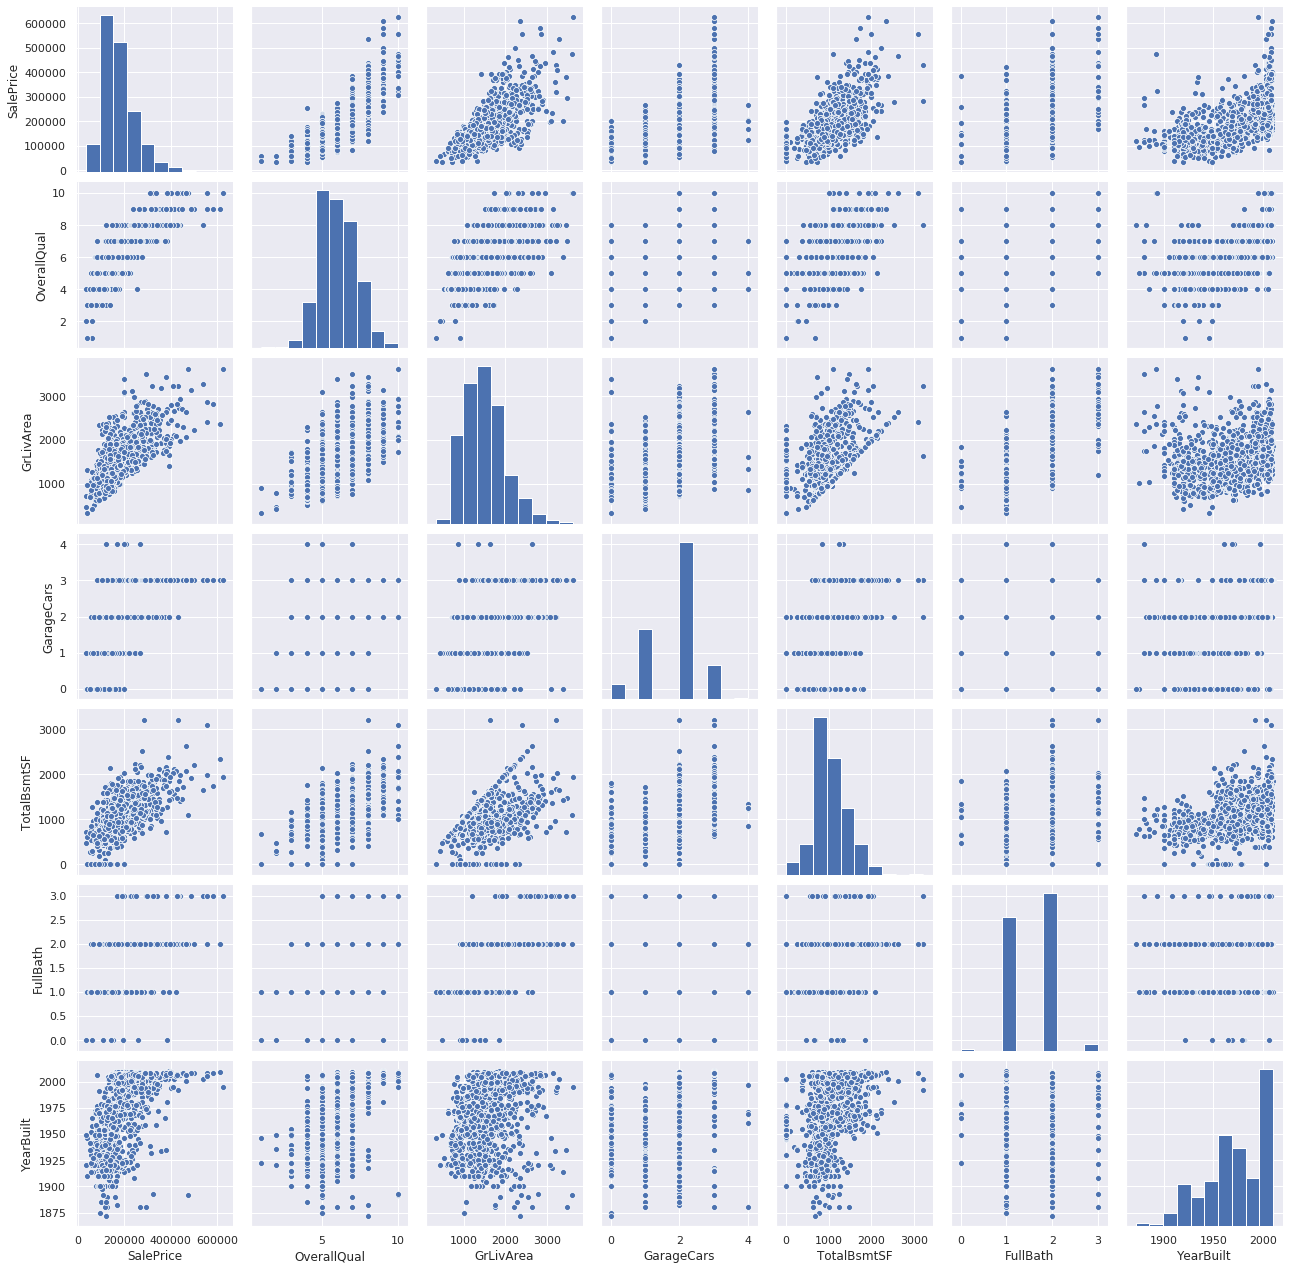

In [17]:
#Scatter plots between 'SalePrice' and correlated variables
print(top_corr_features)
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], height = 2.5)
plt.show();

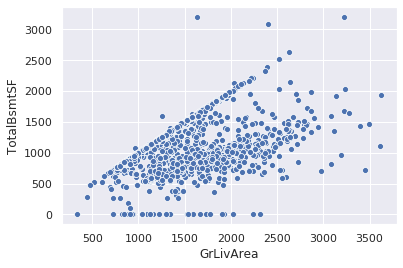

In [18]:
sns.scatterplot(train.GrLivArea,train.TotalBsmtSF)



#### It can be observed that GrLivArea(Above grade (ground) living area square feet) is greater than 
#### TotalBsmtSF(Total square feet of basement area)
#### in most of the cases


 mu = 180151.23 and sigma = 76670.25



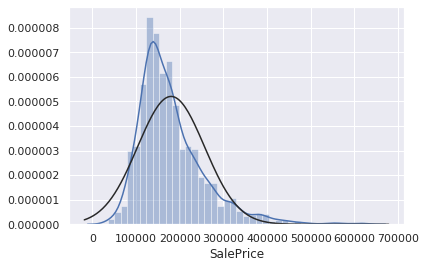

<Figure size 432x288 with 0 Axes>

In [19]:
check_skewness('SalePrice')

#### SalePrice or our target variable is skewed towards the left of the median as it is evident from the above plot.
#### Regression model will not work if it is not a normal distribution as it can affect the parameter calculations, the above plot is skewed right so we need to normalize it. We use a log normalisation.


 mu = 12.02 and sigma = 0.40



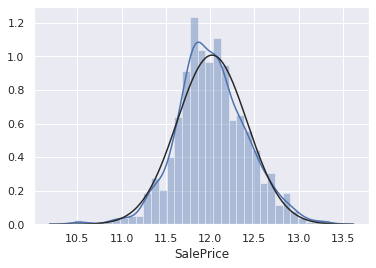

<Figure size 432x288 with 0 Axes>

In [20]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

check_skewness('SalePrice')

#### We can see that the data has become fairly normal
#### If you log transform the response variable, it is required to also log transform feature variables that are skewed. We will do it at a later stage.

# Feature Engineering

#### We are using some data mining techniques to make the data prediction more accurate.
#### We are concatinating test data and train data and are also remembering their respective sizes.
#### This is necessary as all the data mining techniques done to train data should be done to the test data too.

In [21]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values      # y_train is the target variable i.e. SalePrice and is stored seperately
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)   #SalePrice from train data is dropped for further analyses
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2915, 79)


## Handling missing data

In [22]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100  #percentage of missing data
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na}) #missing data is a dataframe having top 30 missing features
missing_data

,Missing Ratio
PoolQC,99.725557
MiscFeature,96.397942
Alley,93.207547
Fence,80.445969
FireplaceQu,48.713551
LotFrontage,16.672384
GarageFinish,5.454545
GarageYrBlt,5.454545
GarageQual,5.454545
GarageCond,5.454545


Text(0.5, 1.0, 'Percent missing data by feature')

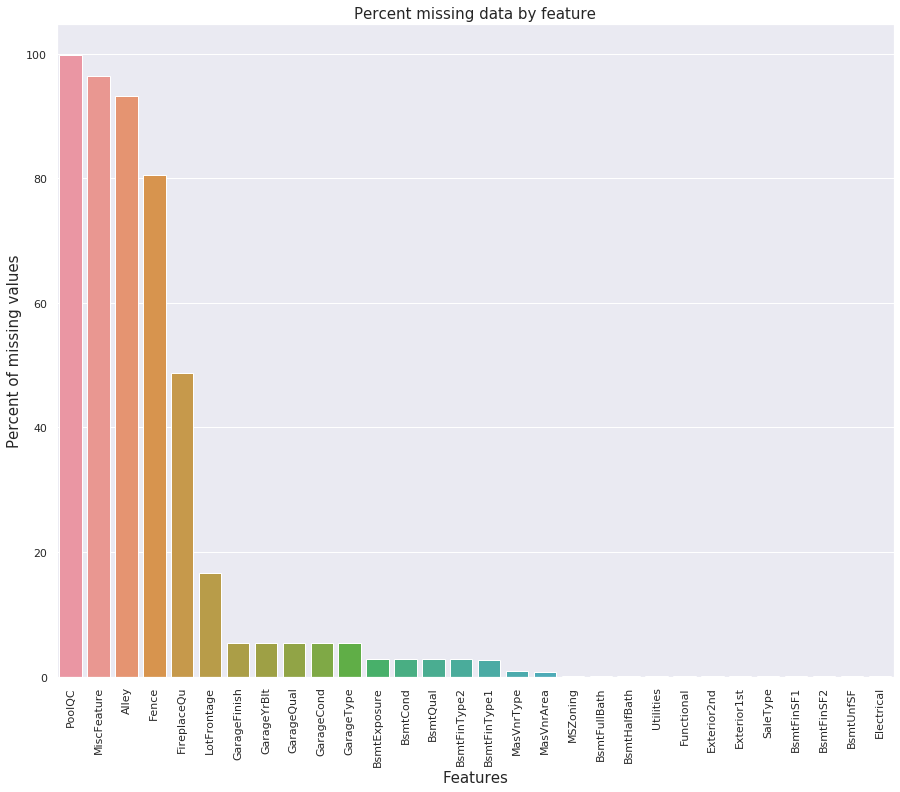

In [23]:
#plot missing data percentages (to make a relative comparison)
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [24]:
all_data = all_data.drop(['PoolQC'], axis=1)

# As nearly 100% of PoolQC are missing, we can safely drop that feature

In [25]:
all_data["Alley"] = all_data["Alley"].fillna("None")

#From the data description, NA means No alley access 

In [26]:
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

#NA means None from the data description

In [27]:
all_data["Fence"] = all_data["Fence"].fillna("None")

#NA means No Fence from the data description

In [28]:
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

#NA means No Fireplace from the data description

In [29]:
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

#LotFrontage(Linear feet of street connected to property) is assumed to be the median of the neighborhood properties

In [30]:
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    all_data[col] = all_data[col].fillna('None')
    
#NA means No Garage according to the data description

In [31]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

#Numerical features. They might be missing because garage may not be present at all. We are assuming them to be zero

In [32]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
    
#Similar explanation as the above one

In [33]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

#Categorical features, similar explanation as above

In [34]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

#MasVnrArea: Masonry veneer area in square feet
#Similar explanation

In [35]:
all_data['Functional'].value_counts()

Typ     2713
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [36]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

#Home functionality: Replaced with Typ, the most occured value

In [37]:
mode_col = ['Electrical','KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType']
for col in mode_col:
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])
    
#Similar to functionality, these features are replaced with their mode values

In [38]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [39]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [40]:
#A sanity check for missing data to confirm 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

missing_data

,Missing Ratio
Utilities,0.068611


#### We have accounted for all the missing features as the above dataframe is empty.

### Removing redundant data (these were identified from the skew)

In [41]:
all_data['Utilities'].value_counts()

AllPub    2912
NoSeWa       1
Name: Utilities, dtype: int64

In [42]:
all_data['MiscVal'].value_counts()

0        2812
400        18
500        13
450         9
600         8
700         7
2000        7
650         3
1200        3
1500        3
4500        2
2500        2
480         2
3000        2
12500       1
300         1
350         1
8300        1
420         1
80          1
54          1
460         1
490         1
3500        1
560         1
17000       1
15500       1
750         1
800         1
900         1
1000        1
1150        1
1300        1
1400        1
1512        1
6500        1
455         1
620         1
Name: MiscVal, dtype: int64

In [43]:
all_data = all_data.drop(['Utilities'], axis=1)
all_data = all_data.drop(['MiscVal'], axis=1)

#Except for one, all the other samples have the same value.
#Irrelevant for analysis, dropping it

### Accounting for categorical features

#### The data in the following group, all have categorical variables disguised in number format.
#### We have to change them to the string type

In [44]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)


#### LabelEncoder encode labels with a value between 0 and n_classes-1 where n is the number of distinct labels. 
#### If a label repeats it assigns the same value to as assigned earlier.


In [45]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))



Shape all_data: (2915, 76)


In [46]:
# Adding total sqfootage feature , Usually houses are categorised by area
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']



In [47]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features using skew utility
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(15)
#top 15



Skew in numerical features: 



,Skew
PoolArea,18.701829
LotArea,13.123758
LowQualFinSF,12.080315
3SsnPorch,11.368094
LandSlope,4.971350
KitchenAbvGr,4.298845
BsmtFinSF2,4.142863
EnclosedPorch,4.000796
ScreenPorch,3.943508
BsmtHalfBath,3.942892


In [48]:
#applying log tranformation where skewness > 0.75 and skewness < -0.75
skewness = skewness[abs(skewness) > 0]
skewed_features = skewness.index
for feat in skewed_features:
    all_data[feat] = np.log1p(all_data[feat])

In [49]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness[abs(skewness) > 0.75]
#print(skewness[skewness[‘’]==’SalePrice’].index.values)


Skew in numerical features: 



,Skew
PoolArea,16.332187
3SsnPorch,8.818976
LowQualFinSF,8.551587
LandSlope,4.480719
BsmtHalfBath,3.785015
KitchenAbvGr,3.517415
ScreenPorch,2.943234
BsmtFinSF2,2.460035
EnclosedPorch,1.958822
HalfBath,NaN


#### A noticeable improvement is seen with the skewed data

In [50]:
all_data = pd.get_dummies(all_data)
all_data.shape

(2915, 218)

#### Earlier, we had concatenated train and test data for feature engineering purposes
#### We have to split it back to the original form for modelling purposes

In [51]:
train = all_data[:ntrain]
test = all_data[ntrain:]
train.shape

(1456, 218)

In [52]:
#Validation function
n_folds = 3
mse_scorer = make_scorer(mean_squared_error)
r2_scorer = make_scorer(r2_score)
def rmsle_cv(model):
    cv_ret = cross_validate(model,train.values,y_train,scoring = {'mse' : mse_scorer,'r2' : r2_scorer}, cv = n_folds)
    return cv_ret



# Modelling

### As the problem involves predicting a variable wrt. other variables, we will use mutivariate linear regression models.
### Also, to tackle the cases of overfitting, we arrive at Lasso and ridge regressions to choose from.
### The methods are chosen only from ones those were covered in the class.

#### best_score_: Mean cross-validated score of the best_estimator. Score here means the R2 score.

In [53]:
linear_reg = LinearRegression(normalize = True)
parameters = [0.0001, 0.001, 0.003, 0.009, 0.01, 0.03, 0.06, 0.09, 0.1, 0.5, 1, 5, 10]
param_grid = {'alpha' : parameters}
linear_cv = GridSearchCV(linear_reg, param_grid = {}, cv = 3)

linear_cv.fit(train, y_train)
# Print the tuned parameters and score 
print("Result of OLS Regression:\n")
score = rmsle_cv(linear_cv)
print("MSE mean score = ",sum(score['test_mse'])/len(score['test_mse']))
print("r2 mean score = ",sum(score['test_r2'])/len(score['test_r2']))

Result of OLS Regression:

MSE mean score =  1.9222914495694723e+20
r2 mean score =  -1.1941326838111813e+21


In [54]:
pd.DataFrame(linear_cv.cv_results_)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.025908,0.013182,0.001899,0.000495,{},-4.479660e+22,-8.851508e+19,-2.012137e+20,-1.502878e+22,2.104908e+22,1


#### OLS is discarded due to the negative score.

#### Regression is carried out with GridSearchCV utility function which performs a cross validation and selects the hyperparameter 'alpha'. Here, the cross validation is 3-fold (project guideline instructs to choose a roughly 70-30 train-test split).

### Lasso Regression

In [55]:
lasso = Lasso()
parameters = [0.0001, 0.001, 0.003, 0.009, 0.01, 0.03, 0.06, 0.09, 0.1, 0.5, 1, 5, 10]
param_grid = {'alpha' : parameters}
# Instantiating the GridSearchCV object 
lasso_cv = GridSearchCV(lasso, param_grid, cv = 3) 
  
lasso_cv.fit(train, y_train)
  
# Print the tuned parameters and score 
print("Result of Lasso Regression:\n")
print("Tuned Lasso Regression Parameters: {}".format(lasso_cv.best_params_))  
score = rmsle_cv(lasso_cv)
print("MSE mean score = ",sum(score['test_mse'])/len(score['test_mse']))
print("r2 mean score = ",sum(score['test_r2'])/len(score['test_r2']))


Result of Lasso Regression:

Tuned Lasso Regression Parameters: {'alpha': 0.001}
MSE mean score =  0.01393872254102986
r2 mean score =  0.9112493923128753


#### Lasso feature extraction

In [56]:
null_coeffs = pd.Series(lasso_cv.best_estimator_.coef_, index=train.columns)
res = null_coeffs.to_list()
zero_count = 0
for val in res:
    if val == 0:
        zero_count += 1
print("Lasso eliminated ",zero_count," variables out of ",len(res)," variables")

Lasso eliminated  147  variables out of  218  variables


### Ridge Regression

In [57]:
ridge = Ridge()
parameters = [0.0001, 0.001, 0.003, 0.009, 0.01, 0.03, 0.06, 0.09, 0.1, 0.5, 1, 5, 10, 20, 50, 100]
param_grid = {'alpha' : parameters}
# Instantiating the GridSearchCV object 
ridge_cv = GridSearchCV(ridge, param_grid, cv = 3) 
  
ridge_cv.fit(train, y_train)
  
# Print the tuned parameters and score 
print("Tuned Ridge Regression Parameters: {}".format(ridge_cv.best_params_))  
score = rmsle_cv(ridge_cv)
print("MSE mean score = ",sum(score['test_mse'])/len(score['test_mse']))
print("r2 mean score = ",sum(score['test_r2'])/len(score['test_r2']))

Tuned Ridge Regression Parameters: {'alpha': 5}
MSE mean score =  0.013844886596199438
r2 mean score =  0.9118340189222528


In [58]:
#lasso performs better
lasso_cv.fit(train,y_train)
ridge_cv.fit(train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.003, 0.009, 0.01, 0.03,
                                   0.06, 0.09, 0.1, 0.5, 1, 5, 10, 20, 50,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

#### As LASSO and RIDGE models perform more or less similar, we shall take a weighted average of them to be the final predictor. Since, RIDGE has a marginally high score, we are giving a higher priority for RIDGE model.

#### Finally, SalePrice is converted back to its original form from the logarithmic transformed form

In [59]:
final_model = (0.45*np.expm1(lasso_cv.predict(test)) + 0.55*np.expm1(ridge_cv.predict(test)) )

In [60]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = final_model
sub.to_csv('submission_project_final.csv',index=False)

In [61]:
#### The entry got top 22% in global Kaggle Leaderboard with a rank 1084 and a score 0.12365.
#### https://kaggle.com/c/house-prices-advanced-regression-techniques
#### Improvements are possible with advanced regression techniques